# Imports

In [45]:
import pandas as pd
import numpy as np
import requests
from io import StringIO, BytesIO
import os
from shutil import copyfile
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

# Load and rename images

We have a total of **139** images to train the model to count metal sheets of sizes thicknesses between .75 and 1.5 mm.

In [11]:
search = r'\d,\d{2}m+'
all_files = {}
## detecting dirs and its files
for root, dirs, files in os.walk('../raw_data'):
    # look for measurement in naming
    s = re.search(search, root)
    if s:
        t = s.group().replace(",","_")
        print(t)
        if t in all_files:
            for file in files:
                all_files[t].append(os.path.join(root, file))
        else:
            all_files[t] = []
            for file in files:
                all_files[t].append(os.path.join(root, file))

1_00mm
1_00mm
1_00mm
0_75mm
1_00mm
1_00mm
1_00mm
1_00mm
1_00mm
1_00mm


In [12]:
all_files

{'1_00mm': ['../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_123854.jpg',
  '../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_123913.jpg',
  '../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_123907.jpg',
  '../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_123848.jpg',
  '../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_124010.jpg',
  '../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_123838.jpg',
  '../raw_data/8_DC05+ZE25_25APC_1,00mm/20210409_124000.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124620.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124546.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124626.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124518.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124526.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124511.jpg',
  '../raw_data/11_DC04_1,00mm/20210409_124538.jpg',
  '../raw_data/13_X5CrNi18-10 Edelstahl_1,00mm/20210409_125107.jpg',
  '../raw_data/13_X5CrNi18-10 Edelstahl_1,00mm/20210409_125101.jpg',
  '../raw_data/13_X5CrNi18-10 Edelstahl_1,00mm/2021040

In [14]:
os.mkdir('../raw_data/renamed', )
path = '../raw_data/renamed/'
for mm, imgs in all_files.items():
    for c, img in enumerate(imgs):
        filename = os.path.join(path, f'{mm}_{c}.jpg')
        copyfile(img, filename)
        print(f'copied file to this directory: {filename}')

copied file to this directory: ../raw_data/renamed/1_00mm_0.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_1.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_2.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_3.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_4.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_5.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_6.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_7.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_8.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_9.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_10.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_11.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_12.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_13.jpg
copied file to this directory: ../raw_data/renamed/1_00mm_14.jpg
copied file to this directory: ../r

# Exploring the dataset

The images show amateur photographs of metal sheet stacks on pallets in a warehouse during daylight conditions. The data provided contains metal sheets of sizes 0.75mm and 1.5mm. The sheets are either perforated or expanded. The perforated sheets lie horizontally on top of each other. The expanded metal forms a wavy profile when stacked.

## Examples

In [43]:
# listing all existing imgs
imgs = [os.path.join(path, name) for name in os.listdir(path)]
imgcount = len(imgs)

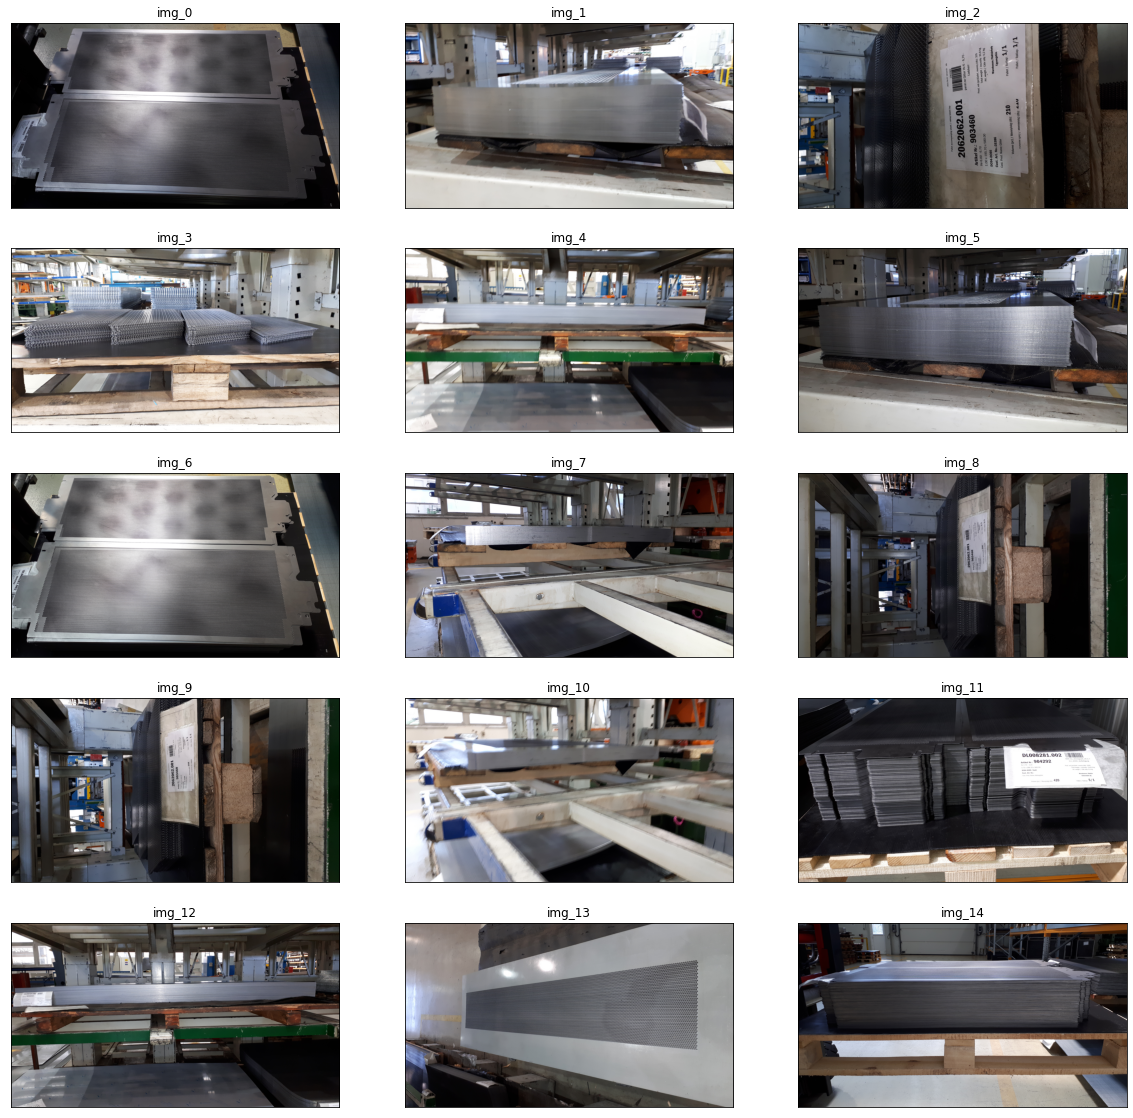

In [42]:
# showcasing some img examples
fig = plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.title(f'img_{i}', size=12)
    plt.imshow(mpimg.imread(imgs[i]))
    plt.xticks(())
    plt.yticks(())

## Image quality

As visible, some of the images are not usable due to blurryness wrong angles. They would add too much noise to the model and will be manually sorted out of the data set. The optimal image should show the sheet stack from the side with enough light to detect the contrast between the sheets.

In [46]:
## find img resolutions
sizes =[]
for img in imgs:
    im = PIL.Image.open(img)
    sizes.append(im.size)

In [51]:
# all images have the same resolution
print(f'The resolution of all images is: \033[1m{sizes[0][0]}x{sizes[0][1]}px\033[0m')

The resolution of all images is: 4608x2592px


**Note**<br>
Further compressing and grayscaling will be assessed in the model tuning process.

# Targeting images

Initially the sheets on each image have to be counted manually and then set as a target. The target count will be stored in the files name.